In [10]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn
import sklearn
import yaml
import math
import seaborn as sns

from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

In [11]:
with open("config.yml","r") as cfg:
    cfg = yaml.safe_load(cfg)

In [12]:
data_test = pd.read_csv(cfg["datasets"]["space_titanic"]["test"])
data_train = pd.read_csv(cfg["datasets"]["space_titanic"]["train"])

In [13]:
data_train = data_train.drop(["PassengerId","Name"], axis=1)
data_test = data_test.drop(["PassengerId","Name"], axis=1)

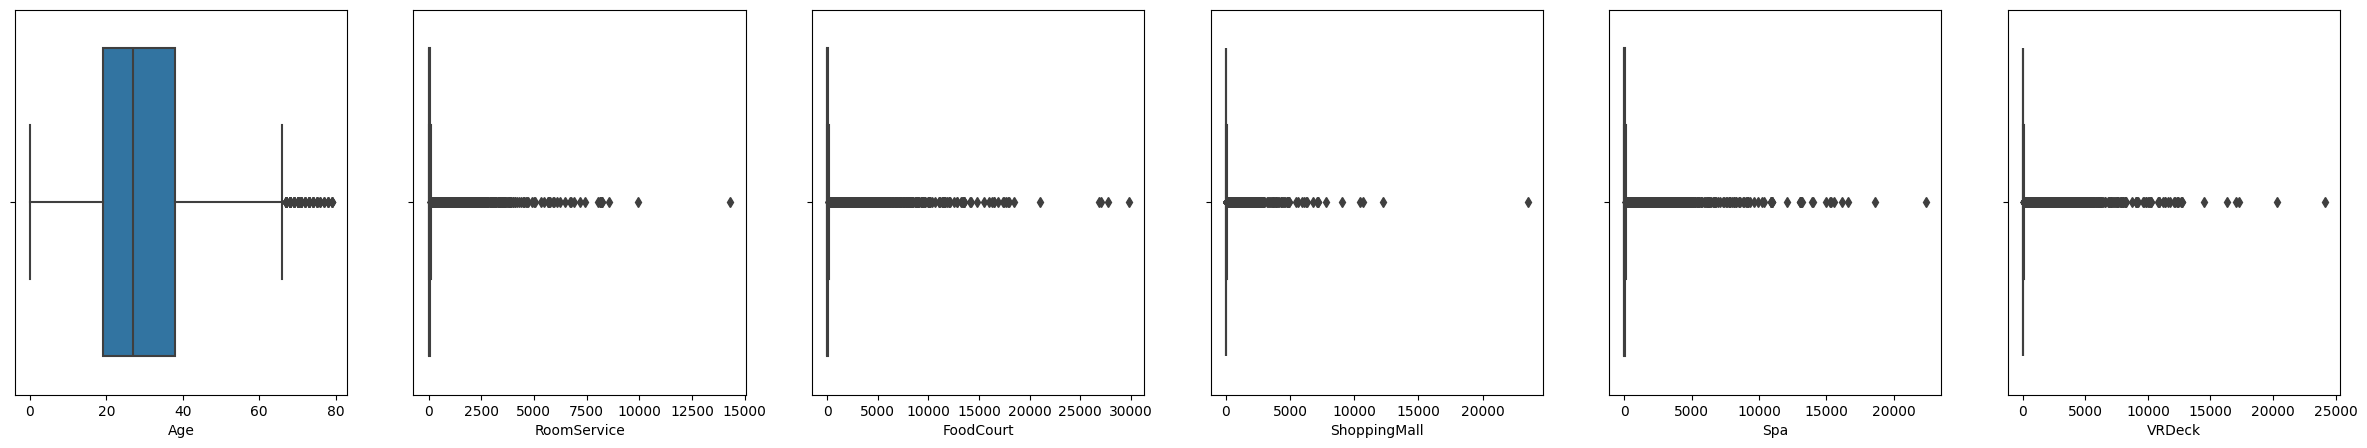

In [14]:
num_col = list(data_train.select_dtypes(include=['int','float']).columns)

fig, ax = plt.subplots(ncols=len(num_col))
fig.set_size_inches((30,5))

for i in range(len(num_col)):
    sb = seaborn.boxplot(data_train,x=num_col[i],ax=ax[i])
    fig = sb.get_figure()
    fig.savefig("images/boxes.png") 

In [15]:
data_train = data_train.drop(data_train[(data_train["RoomService"] > 10000)|
                                        (data_train["FoodCourt"] > 20000)|
                                        (data_train["ShoppingMall"] > 15000)|
                                        (data_train["Spa"] > 18000)|
                                        (data_train["VRDeck"] > 17000)].index)

data_train = data_train.drop_duplicates()
data_test = data_test.drop_duplicates()
data_train = data_train.reset_index()
data_test = data_test.reset_index()
data_train = data_train.drop("index",axis=1)
data_test = data_test.drop("index",axis=1)

In [16]:
cat1 = data_train.columns[data_train.isnull().any()].tolist()
cat2 = ['Age','RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
cat1 = [x for x in cat1 if x not in cat2]

In [17]:
data_test.to_csv("data/prep/data_test_cleaned.csv")
data_train.to_csv("data/prep/data_train_cleaned.csv")